# [Retag most popular Leetcode problems](https://gist.github.com/Windsooon/e663358a6be45a93af2665206c4d4ae9)

#[Leetcode solutions - back to back swe](https://www.youtube.com/results?search_query=back+to+back+swe)
#[Leetcode solutions - basketwangCoding](https://www.youtube.com/channel/UCE35PnPX7EZi8nHSegjMn6Q)

[花花酱 LeetCode 题目分类](https://docs.google.com/spreadsheets/d/1SbpY-04Cz8EWw3A_LBUmDEXKUMO31DBjfeMoA0dlfIA/edit#gid=126913158)

[Leetcode 题解 - 目录.md](https://github.com/CyC2018/CS-Notes/blob/master/notes/Leetcode%20%E9%A2%98%E8%A7%A3%20-%20%E7%9B%AE%E5%BD%95.md)

# [Data Structures — A Quick Comparison](https://medium.com/omarelgabrys-blog/data-structures-a-quick-comparison-6689d725b3b0)

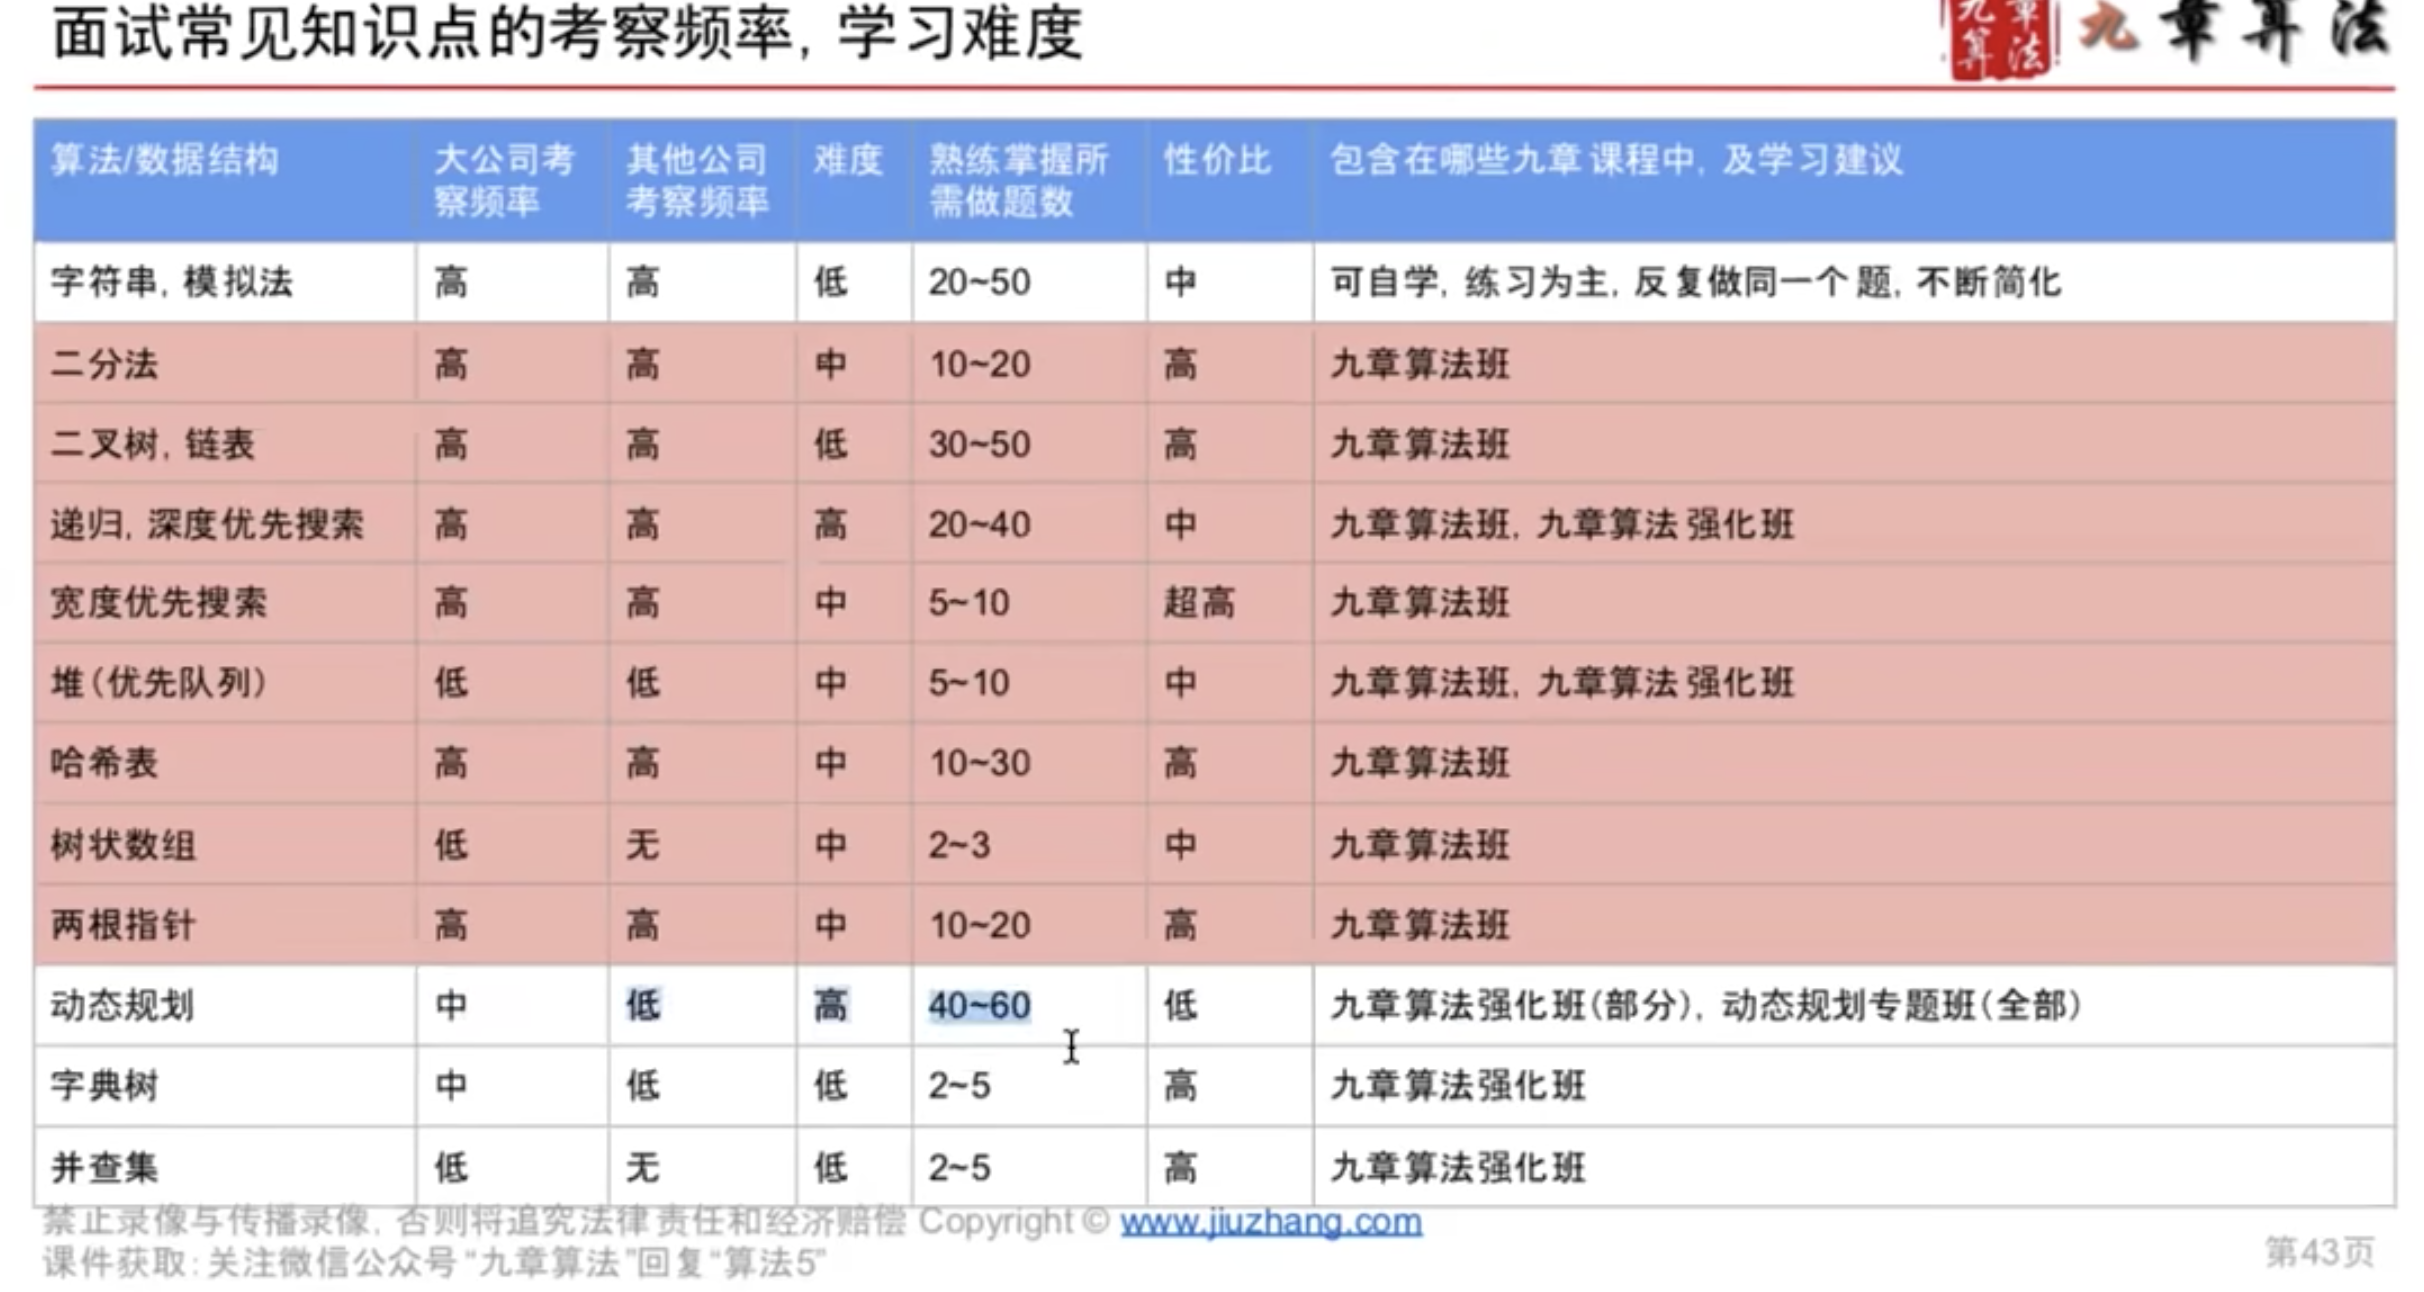

# [Tutorial](https://www.jiuzhang.com/tutorial/algorithm)

# Chapter 1 Defect the Algorithm Interview

# 13 Impletment strStr() (lc 28)

In [25]:
class Solution:
    """
    @param source: 
    @param target: 
    @return: return the index
    """
    def strStr(self, source, target):
        # Write your code here
        if len(target) == 0:
            return 0
        
        if len(target) > len(source): # avoid this case go to the for loop
            return -1
            
        for i in range(len(source) - len(target) + 1):
            if source[i:len(target)+i] == target:
                return i 
        
        return -1       

# 200. Longest Palindromic Substring (lc 5)

Expand around the center: https://leetcode.com/problems/longest-palindromic-substring/solution/

In [13]:
# O(n^2) O(1)
class Solution:
    def longestPalindrome(self,s):
        if not s:
            return ""
        if s == "":
            return ""
        longest = ""
        for middle in range(len(s)):
            sub = self.ExpandAroundCenter(s,middle,middle)
            if len(sub) > len(longest):  # this comparision is inside the for loop
                longest = sub
            sub = self.ExpandAroundCenter(s,middle,middle+1) # When "middle + 1" equals to len(s), it directly return s[(left+1):right]
            if len(sub) > len(longest):
                longest = sub
        return longest

    def ExpandAroundCenter(self,s,left,right):
        while left >= 0 and right <= (len(s)-1) and s[left] == s[right]:
            left -= 1
            right += 1
        
        return s[(left+1):right] # return left+1, since when the while stops, left is not equal to right, so don't contain left, right      

# 667. Longest Palindromic Subsequence (lc 516)

Clarify the problem: https://leetcode.com/problems/longest-palindromic-subsequence/discuss/99110/What-is-the-meaning-of-example-1

Difference between xrange and range: https://www.pythoncentral.io/how-to-use-pythons-xrange-and-range/

In [1]:
# Following Approach is dynamic programming

# 1 this is backward solution: first known value is DP[len(s)-1][len(s)-1]
def Longest_Palin_Subsequence(s):
    if len(s) ==0:
        return 0
    
    DP = [[0]*len(s) for _ in range(len(s))]
    
    # DP[i][j] means the length of Palindromic subsequence of substring s[i:(j+1)]
    for i in range(len(s)-1, -1, -1):  # bottom-to-up:  
        DP[i][i] = 1
        for j in range(i+1,len(s)):  # j is larger than i
            if s[i] == s[j]:
                DP[i][j] = DP[i+1][j-1] + 2
            else:
                DP[i][j] = max(DP[i+1][j], DP[i][j-1])
            
    return DP[0][len(s)-1]

# 1 this is forward solution: first known value is DP[0][0]
class Solution:
    def longestPalindromeSubseq(self,s):
        if len(s) ==0:
            return 0
        
        DP = [[0]*len(s) for _ in range(len(s))] # DP[i][j] means the maximum length of Palindromic subsequence of substring s[i:(j+1)]
    
        for i in range(len(s)):  # 
            DP[i][i] = 1                    
            for j in range(i-1,-1,-1):  # j is smaller than i
                if s[i] == s[j]:
                    DP[j][i] = DP[j+1][i-1] + 2 # when j = i - 1, DP[i-1][i] += 2
                else:
                    DP[j][i] = max(DP[j][i-1], DP[j + 1][i])
            
        return DP[0][len(s)-1]      
    

# Chapter 2 BFS model

[When to use BFS](https://www.jiuzhang.com/tutorial/algorithm/67)

层级遍历 Level Order Traversal

由点及面 Connected Component

拓扑排序 Topological Sorting

BFS is not limited to binary tree, it could be graph. While chapter 3 focus on binary tree and some special tree like "Binary Search Tree" and "Balanced Binary Tree". 


[Topological sorting](https://www.jiuzhang.com/tutorial/algorithm/68)
[算法描述](https://www.jiuzhang.com/tutorial/algorithm/69)

Topological sorting is also very similar to #605 Course Schedule, the difference is how to get in_degress information.

In [1]:
class Solution:

    """
    @param graph: A list of Directed graph node
    @return: A list of integer
    """
    
    def topSort(self, graph):
        node_to_indegree = self.get_indegree(graph)

        # bfs
        order = []
        start_nodes = [n for n in graph if node_to_indegree[n] == 0]
        queue = collections.deque(start_nodes)
        while queue:
            node = queue.popleft()
            order.append(node)
            for neighbor in node.neighbors:
                node_to_indegree[neighbor] -= 1
                if node_to_indegree[neighbor] == 0:
                    queue.append(neighbor)
                
        return order
    
    def get_indegree(self, graph):
        node_to_indegree = {x: 0 for x in graph}

        for node in graph:
            for neighbor in node.neighbors:
                node_to_indegree[neighbor] += 1
                
        return node_to_indegree

[二叉树的BFS vs 图的BFS](https://www.jiuzhang.com/tutorial/algorithm/131)

二叉树中进行 BFS 和图中进行 BFS 最大的区别就是二叉树中无需使用 HashSet（C++: unordered_map, Python: dict) 来存储访问过的节点（丢进过 queue 里的节点）因为二叉树这种数据结构，上下层关系分明，没有环（circle），所以不可能出现一个节点的儿子的儿子是自己的情况。

## 1091. Shortest Path in Binary Matrix

In [ ]:
# BFS
# Time O(N^2)
# Space O(N^2)

class Solution:
    def shortestPathBinaryMatrix(self, grid: List[List[int]]) -> int:
        self.Directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (1, -1), (1, 1), (-1, -1), (-1, 1)]
        if grid[0][0] or grid[-1][-1]:
            return -1
        N = len(grid)
        queue = collections.deque([(0, 0, 1)])
        while queue:
            cur_x, cur_y, cur_len = queue.popleft()
            if cur_x == N - 1 and cur_y == N - 1:
                return cur_len
            
            for delta_x, delta_y in self.Directions:
                next_x, next_y = cur_x + delta_x, cur_y + delta_y
                if self.is_valid(grid, N, next_x, next_y):
                    grid[next_x][next_y] = 1 # mark it as visited
                    queue.append((next_x, next_y, cur_len + 1))
        return -1
    
    def is_valid(self, grid, N, x, y):
        return 0 <= x < N and 0 <= y < N and not grid[x][y]

## 279. Perfect Squares(M)

In [ ]:
# BFS + reduce redudant calculation
# Time: O(n^(h/2))  Space:O(n^(h/2)), h is the maximal number of recursion
class Solution:
    def numSquares(self, n: int) -> int:
        square_nums = [i**2 for i in range(1, int(math.sqrt(n)) + 1)]
        visited = set()
        queue = collections.deque([0])
        level = 0
        while queue:
            level += 1
            for _ in range(len(queue)): # level by level
                cur_sum = queue.popleft()
                for square_num in square_nums:
                    next_sum = cur_sum + square_num
                    if next_sum == n:
                        return level
                    elif next_sum > n:
                        break
                    if next_sum < n and next_sum not in visited:
                        queue.append(next_sum)
                        visited.add(next_sum)  
        return -1
    
# DP
# Time O(n**(3/2)) Space O(n**(1/2))
class Solution:
    def numSquares(self, n: int) -> int:
        Squares = [i**2 for i in range(1, n//2 + 2)]
        dp = [float('inf')] * (n + 1)
        dp[0], dp[1] = 0, 1
        for i in range(2, n + 1):
            for square in Squares:
                if square > i:
                    break
                dp[i] = min(dp[i], dp[i - square] + 1)
                
        return dp[-1]

# 91. Decode Ways(M)

In [ ]:
# DP
# Time O(n), Space O(n)
class Solution:
    def numDecodings(self, s: str) -> int:
        dp = [0] * (len(s) + 1)
        dp[0]= 1
        dp[1] = 1 if s[0] != '0' else 0 # attention
        for i in range(2, len(s) + 1):            
                dp[i] = (s[i-1] != '0') * dp[i-1] + (int(s[i-2:i]) in range(10, 27)) * dp[i-2]  # last digit and last two digit 
        return dp[-1]

# 69. Binary Tree Level Order Traversal (lc 102)

Leetcode comments: In Python using Queue structure would be an overkill since it's designed for a safe exchange between multiple threads and hence requires locking which leads to a performance loose. In Python the queue implementation with a fast atomic append() and popleft() is deque.

In [1]:
# O(n) O(n)

def levelOrder(self, root):
        # write your code here
        if root is None:
            return []
        
        queue = deque([])
        result = []
        queue.append(root)
        
        while queue:
            level = [] # level is initialized to empty list for each level
            for i in range(len(queue)):
                node = queue.popleft()
                level.append(node.val)
                if node.left:
                    queue.append(node.left)
                if node.right:
                    queue.append(node.right)
                
            result.append(level)
        return result

宽度优先搜索的模板
#[无需分层遍历](https://www.jiuzhang.com/tutorial/algorithm/129)

#[需要分层遍历](https://www.jiuzhang.com/tutorial/algorithm/130)

# The order is the same but there is still slight difference, check [here](https://www.jiuzhang.com/qa/7981/)

In [ ]:
from collections import deque

queue = deque()
seen = set()  #等价于Java版本中的set

seen.add(start)
queue.append(start)
while len(queue):  #无需分层遍历
    head = queue.popleft()
    for neighbor in head.neighbors:
        if neighbor not in seen:
            seen.add(neighbor)
            queue.append(neighbor)
            

            
from collections import deque

queue = deque()
seen = set()  # 二叉树的BFS vs 图的BFS的区别，二叉树中无需使用set来存储访问过的节点,因为不存在环，图可能存在环

seen.add(start)
queue.append(start)
while len(queue):
    size = len(queue)
    for _ in range(size):  #需要分层遍历
        head = queue.popleft()
        for neighbor in head.neighbors:
            if neighbor not in seen:
                seen.add(neighbor)
                queue.append(neighbor)   

# 433. Number of Islands (lc 200)


In [1]:
"Complexity Analysis

Time complexity : O(M×N)O(M×N) where MM is the number of rows and NN is the number of columns.

Space complexity : O(min(M, N)) because in worst case where the grid is filled with lands, the size of queue 
    can grow up to min(M,N)."

from collections import deque
class Solution:
    """
    @param grid: a boolean 2D matrix
    @return: an integer
    """
    def numIslands(self, grid):
        # write your code here
        if not grid or not grid[0]:
            return 0
        
        islands = 0
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j]:
                    self.bfs(grid,i,j)
                    islands += 1 
        return islands
    
    def bfs(self, grid, x, y):
        queue = deque([(x,y)])
        grid[x][y] = False  # change from True to False
        while queue:
            x, y = queue.popleft()  # pop out
            for delta_x, delta_y in [(1,0),(0,-1),(-1,0),(0,1)]:
                next_x = x + delta_x
                next_y = y + delta_y
                if not self.is_valid(grid, next_x, next_y):
                    continue
                queue.append((next_x, next_y)) # if meet some conditions,add it to queue 
                grid[next_x][next_y] = False
    
    def is_valid(self,grid,x,y):
        n, m = len(grid), len(grid[0])
        return 0 <= x< n and 0<=y < m and grid[x][y]  # <= not <
    
# DFS O(M*N) O(M*N)
from collections import deque
class Solution:
    """
    @param grid: a boolean 2D matrix
    @return: an integer
    """
    def numIslands(self, grid):
        # write your code here
        if not grid or not grid[0]:
            return 0
        
        islands = 0
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == "1": # here is a string not a interger
                    self.dfs(grid,i,j)
                    islands += 1 
        return islands
    
    # recursion
    def dfs(self, grid, x, y):
        grid[x][y] = '0' # change status after visiting
        for delta_x, delta_y in [(1,0),(0,-1),(-1,0),(0,1)]:
            next_x = x + delta_x
            next_y = y + delta_y
            if not self.is_valid(grid, next_x, next_y):
                continue
            self.dfs(grid, next_x, next_y) 
    
    def is_valid(self,grid,x,y):
        n, m = len(grid), len(grid[0])
        return 0 <= x< n and 0<=y < m and grid[x][y] == '1'  # <= not <

    
# Union Find without path compression or rank
class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        if not grid or not grid[0]:
            return 0
        m, n = len(grid), len(grid[0])
        self.islands = sum(grid[i][j] == '1' for i in range(m) for j in range(n))
        parent = [i for i in range(m * n)] # each node's index's parent is index
        
        def find(x):
            if parent[x] == x:
                return x
            return find(parent[x])
    
        def union(a, b):
            root_a = find(a)
            root_b = find(b)
            if root_a != root_b: # Just union without rules so parents will change back and forth
                parent[root_a] = root_b
                self.islands -= 1
                
        for i in range(m):
            for j in range(n):
                if grid[i][j] == '0':
                    continue
                index = i * n + j
                if j < n - 1 and grid[i][j+1] == '1': # union right hand
                    union(index, index + 1)
                if i < m - 1 and grid[i+1][j] == '1':
                    union(index, index + n)
                    
        return self.islands
    
# Union Find with path compression and rank
# O(m * n) O(m * n)
class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        if not grid or not grid[0]:
            return 0
        m, n = len(grid), len(grid[0])
        self.islands = sum(grid[i][j] == '1' for i in range(m) for j in range(n))
        parent = [i for i in range(m * n)] # each node's index's parent is index
        rank = [0] * (m*n)
        
        def find(x):
            if parent[x] == x: # path compression
                return x
            return find(parent[x])
    
        def union(a, b): # union with rank: with rules so that path compression can be realized
            root_a = find(a)
            root_b = find(b)
            if root_a != root_b:
                if rank[root_a] > rank[root_b]: 
                    parent[root_b] = root_a
                elif rank[root_a] < rank[root_b]:
                    parent[root_b] = root_a
                else:
                    parent[root_b] = root_a
                    rank[root_a] += 1
                self.islands -= 1
                
        for i in range(m):
            for j in range(n):
                if grid[i][j] == '0':
                    continue
                index = i * n + j
                if j < n - 1 and grid[i][j+1] == '1': # union right hand
                    union(index, index + 1)
                if i < m - 1 and grid[i+1][j] == '1':
                    union(index, index + n)
                    
        return self.islands
                
        
        


# 305. Number of Islands II

# https://leetcode.com/problems/number-of-islands-ii/solution/

In [ ]:
class UnionFind: 
    def __init__(self):
        self.parent = {}
        self.rank = {}
        self.count = 0

    def add(self, p):
        self.parent[p] = p
        self.rank[p] = 1
        self.count += 1
        
    def find(self, x):
            if self.parent[x] == x: # path compression
                return x
            return self.find(self.parent[x])
    
    def union(self, a, b): # union with rank: with rules so that path compression can be realized
        root_a = self.find(a)
        root_b = self.find(b)
        if root_a != root_b:
            if self.rank[root_a] > self.rank[root_b]: 
                self.parent[root_b] = root_a
            elif self.rank[root_a] < self.rank[root_b]:
                self.parent[root_b] = root_a
            else:
                self.parent[root_b] = root_a
                self.rank[root_a] += 1
            self.count -= 1
                
class Solution:
    def numIslands2(self, m: int, n: int, positions: List[List[int]]) -> List[int]:   
        ans = []
        islands = UnionFind()
        for p in map(tuple, positions):
            if p in islands.parent:
                ans += [islands.count]
            else:
                islands.add(p)
                for dp in (0, 1), (0, -1), (1, 0), (-1, 0):
                    q = (p[0] + dp[0], p[1] + dp[1])
                    if q in islands.parent:
                        islands.union(p, q)
                ans += [islands.count]
        return ans

## 547. Friend Circles(M)

In [ ]:
# DFS
# Time O(n^2)
# Space O(n)

# The diffrence with 200 number of islands is the way of dfs
# number of islands: traverse four directions
# friend circle: traverse one people and then all his/her friends (one row and jump to his/her friend's row)

class Solution:
    def findCircleNum(self, M: List[List[int]]) -> int:       
        friend_circle = 0
        visited = [False] * len(M)
        for i in range(len(M)):
            if not visited[i]:
                self.dfs(M, i, visited)
                friend_circle += 1 
        return friend_circle
    
    # recursion
    def dfs(self, M, i, visited):
        visited[i] = True
        for j in range(len(M)):
            if M[i][j] == 1 and not visited[j]:
                self.dfs(M, j, visited)
# BFS
class Solution:
    def findCircleNum(self, M: List[List[int]]) -> int:       
        friend_circle = 0
        visited = [False] * len(M) 
        for i in range(len(M)):
            if not visited[i]:
                self.bfs(M, i, visited)
                friend_circle += 1 
        return friend_circle
    
    # bfs
    def bfs(self, M, i, visited):
        queue = collections.deque([M[i]])
        while queue:
            cur = queue.popleft()
            for j in range(len(M)):
                if cur[j] == 1 and not visited[j]:
                    queue.append(M[j])
                    visited[j] = True
        

# 611. Knight Shortest Path

In [ ]:
# Very similar to 433 number of islands
DIRECTIONS = [
    (-2, -1), (-2, 1), (-1, 2), (1, 2),
    (2, 1), (2, -1), (1, -2), (-1, -2),
]

class Solution:
        
    """
    @param grid: a chessboard included 0 (false) and 1 (true)
    @param source: a point
    @param destination: a point
    @return: the shortest path 
    """
    def shortestPath(self, grid, source, destination):
        queue = collections.deque([(source.x, source.y)])  # start from the source point
        distance = {(source.x, source.y): 0} # record the current distance

        while queue:
            x, y = queue.popleft()
            if (x, y) == (destination.x, destination.y): # if equal return the value
                return distance[(x, y)]
            for dx, dy in DIRECTIONS:
                next_x, next_y = x + dx, y + dy
                if (next_x, next_y) in distance:  # if already in, then skip
                                                  # each step is of equal length, so it returns the shortest path
                    continue
                if not self.is_valid(next_x, next_y, grid):
                    continue
                distance[(next_x, next_y)] = distance[(x, y)] + 1  # a dictionary to record value
                queue.append((next_x, next_y))
        return -1
        
    def is_valid(self, x, y, grid):  # is_valid function is similar
        n, m = len(grid), len(grid[0])

        if x < 0 or x >= n or y < 0 or y >= m:
            return False
            
        return not grid[x][y]  # if 1 return False  0 return True, this way to mark barrier or empty

# 615 Course Schedule (lc 207)

In [2]:
from collections import deque

class Solution:
    """
    @param: numCourses: a total of n courses
    @param: prerequisites: a list of prerequisite pairs
    @return: true if can finish all courses or false
    """
    def canFinish(self, numCourses, prerequisites):
        # write your code here
        edges = {i:[] for i in range(numCourses)}  # the key part is the edges and degrees construction
        degrees = [0 for i in range(numCourses)]
        for i, j in prerequisites:
            edges[j].append(i)  # need to take j first
            degrees[i] += 1
        
        queue = deque([])
        count = 0
        
        for i in range(numCourses):
            if degrees[i] == 0:
                queue.append(i)
        
        while queue:
            node = queue.popleft()
            count += 1 
            
            for x in edges[node]:
                degrees[x] -= 1 
                if degrees[x] == 0:
                    queue.append(x)
        
        return count == numCourses

# 616 Course Schedule II (lc 210)

In [ ]:
from collections import deque
class Solution:
    """
    @param: numCourses: a total of n courses
    @param: prerequisites: a list of prerequisite pairs
    @return: the course order
    """
    def findOrder(self, numCourses, prerequisites):
        # write your code here
        result = []
        edges = {i: [] for i in range(numCourses)}
        degrees = [0 for i in range(numCourses)] 
        for i, j in prerequisites:
            edges[j].append(i) # record the edges  {0: [1, 2], 1: [3], 2: [3], 3: []}
            degrees[i] += 1 # record degrees for each vertex [0, 1, 1, 2]
            
        queue, count = deque([]), 0
        
        for i in range(numCourses):
            if degrees[i] == 0:
                queue.append(i)  # record the vertex that degrees are zero deque([0])

        while queue:
            node = queue.popleft()  
            result.append(node)
            
            count += 1  # number of vertex, which degrees are zero

            for x in edges[node]:
                degrees[x] -= 1  # if course 0 is finished, then its edges degrees should minus 1
                if degrees[x] == 0:
                    queue.append(x) # add the courses that degrees are zeros

        if count == numCourses:  # difference between Course Schedule(lc 207)
            return result
        else:
            return []

# 7 Serialize and Deserialize Binary Tree (lc 297)

In [ ]:
#BFS this version is better than DFS

from collections import deque
"""
Definition of TreeNode:
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left, self.right = None, None
"""


class Solution:
    """
    @param root: An object of TreeNode, denote the root of the binary tree.
    This method will be invoked first, you should design your own algorithm 
    to serialize a binary tree which denote by a root node to a string which
    can be easily deserialized by your own "deserialize" method later.
    """
    def serialize(self, root):
        if root is None:
            return ""
            
        # use bfs to serialize the tree
        queue = deque([root])
        bfs_order = []
        while queue:
            node = queue.popleft()
            bfs_order.append(str(node.val) if node else '#')
            if node:
                queue.append(node.left)
                queue.append(node.right)
            
        return ' '.join(bfs_order)  # bfs_order is a list, add each element with ' '

    """
    @param data: A string serialized by your serialize method.
    This method will be invoked second, the argument data is what exactly
    you serialized at method "serialize", that means the data is not given by
    system, it's given by your own serialize method. So the format of data is
    designed by yourself, and deserialize it here as you serialize it in 
    "serialize" method.
    """
    def deserialize(self, data):
        # None or ""
        if not data:
            return None

        bfs_order = [
            TreeNode(int(val)) if val != '#' else None 
            for val in data.split()
        ]
        root = bfs_order[0]
        fast_index = 1
        
        nodes, slow_index = [root], 0
        while slow_index < len(nodes):  # when nodes is not adding node anymore, it stops
            node = nodes[slow_index]
            slow_index += 1
            node.left = bfs_order[fast_index]
            node.right = bfs_order[fast_index + 1]
            fast_index += 2
            
            if node.left: # skip those nodes that is None
                nodes.append(node.left)
            if node.right:
                nodes.append(node.right)
        
        return root

In [ ]:
# DFS
# Serialization 
class Codec:

    def serialize(self, root):
        """ Encodes a tree to a single string.
        :type root: TreeNode
        :rtype: str
        """
        def rserialize(root, string):
            """ a recursive helper function for the serialize() function."""
            # check base case
            if root is None:
                string += 'None,'
            else:
                string += str(root.val) + ','
                string = rserialize(root.left, string)
                string = rserialize(root.right, string)
            return string
        
        return rserialize(root, '')
    
# Deserialization 
class Codec:

    def deserialize(self, data):
        """Decodes your encoded data to tree.
        :type data: str
        :rtype: TreeNode
        """
        def rdeserialize(l):
            """ a recursive helper function for deserialization."""
            if l[0] == 'None':
                l.pop(0)
                return None
                
            root = TreeNode(l[0])
            l.pop(0)
            root.left = rdeserialize(l)
            root.right = rdeserialize(l)
            return root

        data_list = data.split(',')
        root = rdeserialize(data_list)
        return root

## 279. Perfect Squares(M)

In [ ]:
#DP  
#Time: O(n*sqrt(n)) Space: O(n)
class Solution:
    def numSquares(self, n: int) -> int:
        square_numbers = [i**2 for i in range(1, int(math.sqrt(n)) + 1)]
        dp = [float('inf')] * (n + 1)
        dp[0] = 0
        
        for i in range(1, n + 1):
            for j in square_numbers:
                if j > i:
                    break
                dp[i] = min(dp[i - j] + 1, dp[i])
                
        return dp[-1]
    
# BFS + reduce redudant calculation
# Time: O(n^(h/2))  Space:O(n^(h/2)), h is the maximal number of recursion
class Solution:
    def numSquares(self, n: int) -> int:
        square_nums = [i**2 for i in range(1, int(math.sqrt(n)) + 1)]
        visited = set()
        queue = collections.deque([(0, 0)])
        while queue:
            cur_sum, cur_step = queue.popleft()
            if cur_sum == n:
                return cur_step
            for square_num in square_nums:
                next_sum = cur_sum + square_num
                if next_sum > n:
                    break
                if next_sum <= n and next_sum not in visited:
                    queue.append((next_sum, cur_step + 1))
                    visited.add(next_sum)                    
        return -1
    
# Optimized BFS
class Solution:
    def numSquares(self, n: int) -> int:
        square_nums = [i**2 for i in range(1, int(math.sqrt(n)) + 1)]
        visited = set()
        queue = collections.deque([0])
        level = 0
        while queue:
            level += 1
            for _ in range(len(queue)): # level by level
                cur_sum = queue.popleft()
                for square_num in square_nums:
                    next_sum = cur_sum + square_num
                    if next_sum == n:
                        return level
                    elif next_sum > n:
                        break
                    if next_sum < n and next_sum not in visited:
                        queue.append(next_sum)
                        visited.add(next_sum)  
        return -1   
    
# Optimized BFS
class Solution:
    def numSquares(self, n: int) -> int:
        square_nums = [i**2 for i in range(1, int(math.sqrt(n)) + 1)]
        level = 0
        queue = {n}
        while queue:
            level += 1
            next_queue = set() # reduce redundant calculation
            for remainder in queue:
                for square_num in square_nums:
                    if remainder == square_num:
                        return level
                    elif remainder < square_num:
                        break
                    else:
                        next_queue.add(remainder - square_num)
            queue = next_queue
        return -1

## 127. Word Ladder

In [ ]:
# BFS with preprocessing the the wordList
# Time O(M*N) SpaceO(M*N) M = len(beginWord), N = len(wordList)

from collections import defaultdict
class Solution:
    def ladderLength(self, beginWord: str, endWord: str, wordList: List[str]) -> int:
        if endWord not in wordList or not endWord or not beginWord or not wordList:
            return 0
        # all words are of the same length
        L = len(beginWord)
        all_dict = defaultdict(list)
        
        # preprocessing the wordList to avoid TLE
        for word in wordList:
            for i in range(L):
                all_dict[word[:i] + "*" + word[i+1:]].append(word)
        
        queue = collections.deque([(beginWord, 1)])
        visited = set([beginWord])
        while queue:
            cur_word, level = queue.popleft()
            for i in range(L):
                inter_word = cur_word[:i] + "*" + cur_word[i+1:]
                
                for word in all_dict[inter_word]:
                    if word == endWord:
                        return level + 1
                    if word not in visited:
                        visited.add(word)
                        queue.append((word, level + 1))
                all_dict[inter_word] = [] # if used, then empty
                
        return 0

# Chapter 3 Binary search

# 585. Maximum Number in Mountain Sequence(lc 852)

In [21]:
def mountain_top(list):
    if list is None or not list:
        return -1
    start, end = 0, len(list) - 1
    while (start + 1) < end:
        middle = start + (end - start)/2
        if list[middle] < list[middle + 1]:
            start = middle  # why it is not "middle + 1"
        else:
            end = middle
    return max(list[start],list[end])


class Solution:
    def peakIndexInMountainArray(self, A: List[int]) -> int:
        start, end = 0, len(A) - 1 
        while start < end - 1:
            middle = start + (end - start)//2
            if A[middle] < A[middle + 1]:
                start = middle + 1
            else:
                end = middle
                
        if A[start] > A[end]:  # Do we need this judgement?
            return start
        else:
            return end

# 428. Pow(x, n) (lc 50)

In [ ]:
# Ref https://www.youtube.com/watch?v=yEQq3t3T_J0
class Solution:
    """
    @param x {float}: the base number
    @param n {int}: the power number
    @return {float}: the result
    """
    def myPow(self, x, n):
        # write your code here           
        if n < 0:  # Need to consider n is smaller than 0
            x = 1/x
            n = -n 
        
        ans = 1 
        tmp = x 
        

        while n!=0:
            if n % 2 == 1:  # if n is odd, then ans = x, then you can assume n is even now
                ans *= tmp 
            tmp *= tmp
            n //= 2   # if python3 use //   7//2 = 3   1//2 = 0  2//2 = 1 
        return ans

Take n = 15 as example:
    n = 15 >> 7 >> 3 >> 1 >> 0
    ans = 1 >> x >> x^3 >> x^7 >> x^15
    temp = x >> x^2 >> x4 >> x^8 >> x^16

In [ ]:
# This version is easier to understand with small difference
class Solution:
    """
    @param x {float}: the base number
    @param n {int}: the power number
    @return {float}: the result
    """
    def myPow(self, x, n):
        # write your code here           
        if n < 0:  # Need to consider n is smaller than 0
            x = 1/x
            n = -n 
            
        if n == 0:
            return 1
        
        ans = 1 
        tmp = x 
        

        while n > 1:
            if n % 2 == 1:  # if n is odd, then ans = x, then you can assume n is even now
                ans *= tmp 
            tmp *= tmp
            n //= 2   # if python3 use //   7//2 = 3   1//2 = 0  2//2 = 1 
            
        ans = ans * tmp
        return ans

# 62. Search in Rotated Sorted Array(lc 33)

In [2]:
class Solution:
    """
    @param A: an integer rotated sorted array
    @param target: an integer to be searched
    @return: an integer
    """
    def search(self, A, target):
        # write your code here
        if not A:
            return -1
            
        start, end = 0, len(A) - 1 
        while start < end - 1:
            middle = start + (end-start)/2  
            if A[middle] >= A[start]:  # compare between A[middle] with target
                if A[start] <= target <= A[middle]:  # pay attention to this condition only when target is between start and middle, this is easy condition
                                                     # else takes care of the complex condition
                    end = middle
                else:
                    start = middle
            else:
                if A[middle] <= target <=A[end]:
                    start = middle
                else:
                    end = middle
        
        if A[start] == target:
            return start
        if A[end] == target:
            return end
            
        return -1  # If both start and end are not equal to target

# Chapter 4 [Binary tree and DFS based on binary tree](https://www.jiuzhang.com/tutorial/algorithm/13)

[Binary Tree summary](http://blog.sina.com.cn/s/blog_eb52001d0102v1si.html)

In [13]:
# Good example of preorder, inorder, postorder binary tree

# https://leetcode.com/problems/kth-smallest-element-in-a-bst/solution/

# 145. Binary Tree Postorder Traversal

In [ ]:
# reverse modified preorder traversal
# Time O(N) Space O(h)
class Solution:
    def postorderTraversal(self, root: TreeNode) -> List[int]:
        if not root:
            return []
        stack, inorder = [root], []
        while stack:
            node = stack.pop()
            inorder.append(node.val)
            if node.left:
                stack.append(node.left)
            if node.right:
                stack.append(node.right)
        return reversed(inorder)

In [ ]:
# For binary tree, "divide and conquer" is most often used

binary tree traversal:
level order: BFS

The following tree can be solved by DFS:

# pre order:
def traverse(root, result):
    if not root:
        return
    result.append(root.val)
    traverse(root.left, result)
    traverse(root.right, result)
    
# in order:
def traverse(root, result):
    if not root:
        return
    traverse(root.left, result)
    result.append(root.val) # 注意访问根节点放到了遍历左子树的后面
    traverse(root.right, result)
    
# post order:
def traverse(root, result):
    if not root:
        return
    traverse(root.left, result)
    traverse(root.right, result)
    result.append(root.val) # 注意访问根节点放到了最后

# 66. Binary Tree Preorder Traversal （lc144）

In [ ]:
class Solution:
    """
    @param root: The root of binary tree.
    @return: Preorder in ArrayList which contains node values.
    """
    def preorderTraversal(self, root):
        self.results = []
        self.traverse(root)
        return self.results
        
    def traverse(self, root):
        if root is None:
            return
        self.results.append(root.val)
        self.traverse(root.left)
        self.traverse(root.right)

# Version 1: Non-Recursion  

class Solution:
    """
    @param root: The root of binary tree.
    @return: Preorder in list which contains node values.
    """
    def preorderTraversal(self, root):
        if root is None:
            return []
        stack = [root]  # can we use deque([]) here, the answer is yes!
        preorder = []
        while stack:
            node = stack.pop() # last in first out
            preorder.append(node.val)
            if node.right:  # that is why appending node.right first
                stack.append(node.right) 
            if node.left:
                stack.append(node.left)
        return preorder
    
    
# Version 2: Non-recursion    
class Solution:
    def preorderTraversal(self, root: TreeNode) -> List[int]:
        p, stack = root, []
        res = []
        while p or stack:
            if p: 
                stack.append(p)
                res.append(p.val)
                p = p.left
            else:
                p = stack.pop()
                p = p.right
        return res


# 94. Binary Tree Inorder Traversal

In [ ]:
class Solution:
    def inorderTraversal(self, root: TreeNode) -> List[int]:
        p, stack = root, []
        res = []
        while p or stack:
            if p: 
                stack.append(p)
                p = p.left
            else:
                p = stack.pop()
                res.append(p.val) # res append operation different with preorder traversal
                p = p.right
        return res

# 230. Kth Smallest Element in a BST

In [ ]:
class Solution(object):
    
    # Version 1: (k-1)th element in the inorder traversal O(N), O(N)
        
    def kthSmallest(self, root, k):
        """
        :type root: TreeNode
        :type k: int
        :rtype: int
        """
        return self.inordertraversal(root)[k-1]
    
    def inordertraversal(self, root):
        p, stack = root, []
        res = []
        while p or stack:
            if p:
                stack.append(p)
                p = p.left
            else:
                p = stack.pop()
                res.append(p.val)
                p = p.right
        return res
    
    # Version 2: slight difference with inorder traversal
    # O(H+k) O(H+k)
    class Solution(object):
    def kthSmallest(self, root, k):
        """
        :type root: TreeNode
        :type k: int
        :rtype: int
        """
        p, stack = root, []
        while p or stack:
            if p:
                stack.append(p)
                p = p.left
            else:
                p = stack.pop()
                k -= 1
                if not k: # only difference with inorder traversal code
                    return p.val
                p = p.right
        return res

# 97. Maximum Depth of Binary Tree (lc 104)

In [ ]:
# Recursion, DFS, divide and conquer
# T: O(N) S: best O(log(N)) worst O(N)

class Solution:
    def maxDepth(self, root: TreeNode) -> int:
        if not root:
            return 0
        return max(self.maxDepth(root.left), self.maxDepth(root.right)) + 1

    
# Iteration with stack: similar to preorder traversal with some operation
# T: O(N) S: best O(1), worst O(lgN)
class Solution:
    def maxDepth(self, root: TreeNode) -> int:
        if not root:
            return 0
        stack = [(root, 1)]
        maxDepth = 0
        while stack:
            node, curDepth = stack.pop()
            maxDepth = max(curDepth, maxDepth)
            if node.right:
                stack.append((node.right, curDepth + 1))
            if node.left:
                stack.append((node.left, curDepth + 1))
        return maxDepth
    
    
        


# 遍历法和分治法的区别和联系
遍历是指沿着某条搜索路线，依次对树中每个结点均做一次且仅做一次访问，主要思想就是访问所有元素不重不漏，是否需要返回值需要看具体题目

分治是将问题分解成若干小问题，解决小问题，合起来之后会解决大问题，所以一般来讲分治会用到小问题的解，这个也就需要返回值。

并且分治过程中往往伴随着遍历，并不是说是分治就一定没有遍历。


联系
分治法（Divide & Conquer）与遍历法（Traverse）是两种常见的递归（Recursion）方法。

分治法解决问题的思路
先让左右子树去解决同样的问题，然后得到结果之后，再整合为整棵树的结果。

遍历法解决问题的思路
通过前序/中序/后序的某种遍历，游走整棵树，通过一个全局变量或者传递的参数来记录这个过程中所遇到的点和需要计算的结果。

两种方法的区别
从程序实现角度分治法的递归函数，通常有一个返回值，遍历法通常没有。

# 93 [Balanced Binary Tree](https://www.lintcode.com/problem/balanced-binary-tree/description?_from=ladder&&fromId=1) (lc 110)

In [ ]:
# Divide and conquer
"""
Definition of TreeNode:
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left, self.right = None, None
"""
# DFS time O(N), space worst O(N),average O(lgN)
Not_Balanced = -1 

class Solution:
    """
    @param root: The root of binary tree.
    @return: True if this Binary tree is Balanced, or false.
    """

    
    def isBalanced(self, root):
        # write your code here
        return self.Max_Depth(root) != Not_Balanced  # not equal to
    
    def Max_Depth(self, node): # if not balanced return -1, balanced return maxdepth
        if node is None:  # this judgement is very important, otherwise it is infinite loop
            return 0
        left = self.Max_Depth(node.left)
        right = self.Max_Depth(node.right)
        if left == Not_Balanced or right == Not_Balanced:
            return Not_Balanced
        
        if abs(left - right) > 1:  # Don't forget this most important case
            return Not_Balanced
            
        return max(left, right) + 1

# 95. Validate Binary Search Tree (lc 98)

In [ ]:
class Solution:
    """
    @param root: The root of binary tree.
    @return: True if the binary tree is BST, or false
    """
    
    # recursion divide and conquer DFS time O(N) space worst O(N), average O(lgN)
    def isValidBST(self, root):
        # write your code here
        isBST, minNode, maxNode = self.divideConquer(root)
        return isBST
        
    def divideConquer(self, root):
        if root is None:
            return True, None, None
        
        leftIsBST, leftMin, leftMax = self.divideConquer(root.left)
        rightIsBST, rightMin, rightMax = self.divideConquer(root.right)
        if not leftIsBST or not rightIsBST:
            return False, None, None
        if leftMax is not None and leftMax >= root.val:
            return False, None, None
        if rightMin is not None and rightMin <= root.val:
            return False, None, None
        
        # is BST
        minNode = leftMin if leftMin is not None else root.val
        maxNode = rightMax if rightMax is not None else root.val
        
        return True, minNode, maxNode
    
 # Recursion DFS time O(N) space worst O(N), average O(lgN)   
class Solution:
    def isValidBST(self, root: TreeNode) -> bool:        
        def helper(node, lower = float('-inf'), upper = float('inf')):
            if not node:
                return True
            
            val = node.val
            if val <= lower or val >= upper:
                return False

            if not helper(node.right, val, upper):
                return False
            if not helper(node.left, lower, val):
                return False
            return True

        return helper(root)
        
        
        
        #Iteration PreorderTraversal DFS time O(N), space worst O(N), average O(lgN)
        if not root:
            return True
            
        stack = [(root, float('-inf'), float('inf')), ] 
        while stack:
            root, lower, upper = stack.pop()
            val = root.val
            if val <= lower or val >= upper:
                return False
            if root.right:
                stack.append((root.right, val, upper))
            if root.left:
                stack.append((root.left, lower, val))
        return True
    
 # preodrer traversal template
    def preorderTraversal(self, root):
        if root is None:
            return []
        stack = [root]  # can we use deque([]) here, the answer is yes!
        preorder = []
        while stack:
            node = stack.pop() # last in first out
            preorder.append(node.val)
            if node.right:  # that is why appending node.right first
                stack.append(node.right) 
            if node.left:
                stack.append(node.left)
        return preorder
    
    
        # inorder traversal DFS time worst O(N) , space worst O(N), average O(lgN)
    def isValidBST(self, root):
        """
        :type root: TreeNode
        :rtype: bool
        """
        # inorder traversal
        stack, inorder = [], float('-inf')
        p = root
        while stack or p:
            while p:
                stack.append(p)
                p = p.left
            p = stack.pop()
            # If next element in inorder traversal is smaller than the previous one, then that's not BST.
            if p.val <= inorder:
                return False
            inorder = p.val
            p = p.right

        return True

# 1367. Linked List in Binary Tree(M)

In [ ]:
# Time O(N**2)  # each node could be potential head
# Space O(H)
# where N = tree size, H = tree height, L = list length

class Solution:
    def isSubPath(self, head: ListNode, root: TreeNode) -> bool:
        # Convert the linked list into a path
        DELIMITER = '|'
        subpath = ''
        while head:
            subpath += str(head.val) + DELIMITER
            head = head.next
            
        # dfs traversal of a binary tree
        def dfs(root, path):
            if subpath in path:
                return True
            if not root:
                return False
            return dfs(root.left, path+str(root.val)+DELIMITER) or dfs(root.right, path+str(root.val)+DELIMITER)
            
        return dfs(root, "")
    
 # Time O(N * min(L,H))  # each node could be potential head
# Space O(H)
# where N = tree size, H = tree height, L = list length   
class Solution:
    def isSubPath(self, head: ListNode, root: TreeNode) -> bool:
        if not head: 
            return True
        if not root:
            return False
        return self.dfs(head, root) or self.isSubPath(head, root.left) or self.isSubPath(head, root.right)
    
    def dfs(self, head, root): # in the case of head.val == root.val
        if not head:
            return True
        if not root:
            return False
        if head.val != root.val:
            return False
        return self.dfs(head.next, root.left) or self.dfs(head.next, root.right)

# 72 [Construct Binary Tree from Inorder and Postorder Traversal](https://www.lintcode.com/problem/construct-binary-tree-from-inorder-and-postorder-traversal/description)

In [1]:
def buildtree(self, inorder, postorder):
    if not inorder:
        return None
    root = TreeNode(postorder[-1])
    rootPos = inorder.index(postorder[-1]) # root position in the inorder list
    

# [Recursion, backtracking and search](https://www.jiuzhang.com/tutorial/algorithm/20)

In [ ]:
#递归三要素

1. 递归的定义
每一个递归函数，都需要有明确的定义，有了正确的定义以后，才能够对递归进行拆解。

def maxDepth(root):
    代表 以 root 开头的子树的最大深度是多少

def preorder(root, result):
    代表 将 root 开头的子树的前序遍历放到 result 里面

2. 递归的拆解
一个大问题如何拆解为若干个小问题去解决

leftDepth = maxDepth(root.left)
rightDepth = maxDepth(root.right)
return max(leftDepth, rightDepth) + 1

整棵树的最大深度，可以拆解为先计算左右子树深度，然后在左右子树深度中找到最大值+1来解决。

result.append(root)
preorder(root.left, result)
perorder(root.right, result)

一棵树的前序遍历可以拆解为3个部分：

根节点自己（root）
左子树的前序遍历
右子树的前序遍历

先把 root 放到 result 里 --> result.add(root);
再把左子树的前序遍历放到 result 里 --> preorder(root.left, result)。回想一下递归的定义，是不是正是如此？
再把右子树的前序遍历放到 result 里 --> preorder(root.right, result)。

3. 递归的出口
什么时候可以直接知道答案，不用再拆解，直接 return

# 二叉树的最大深度
if not root:
    return 0

一棵空的二叉树，可以认为是一个高度为0的二叉树。

if not root:
    return

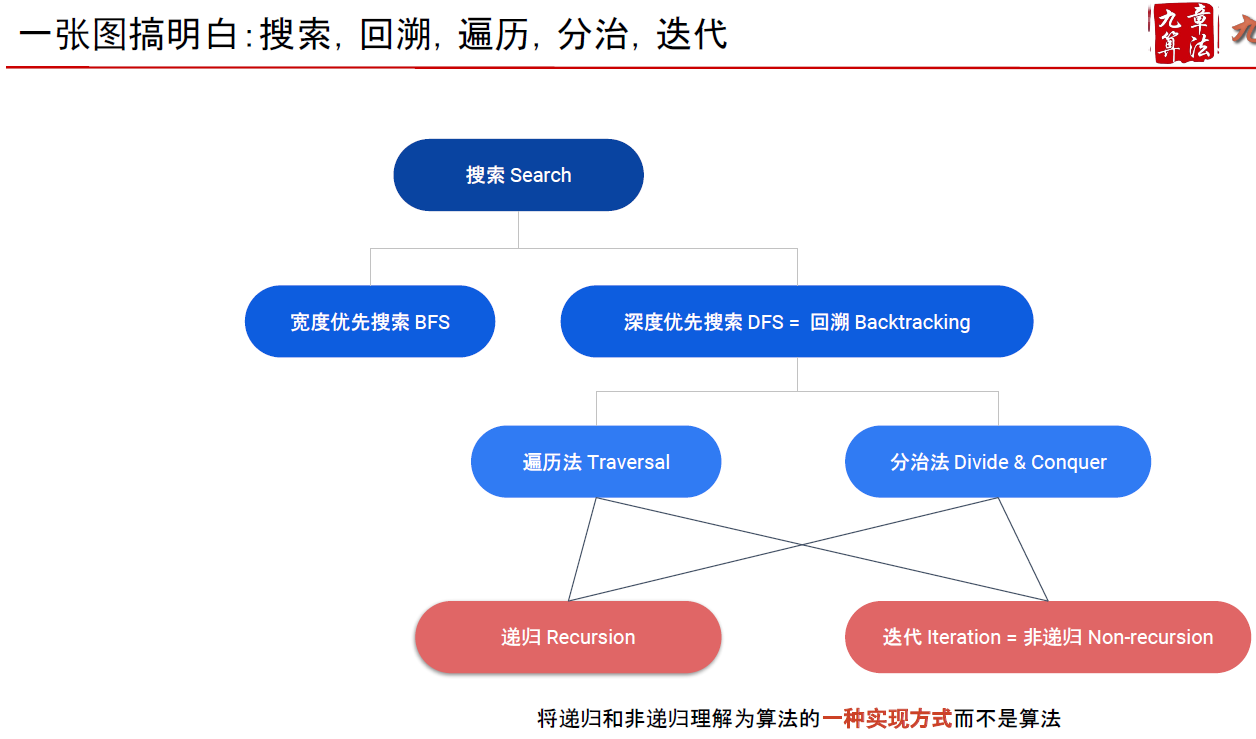

[BST 的增删查改](https://www.jiuzhang.com/tutorial/algorithm/401)

## 96. Unique Binary Search Trees (M)

In [ ]:
# Recursion with memo: Time O(n) Space: O(n)
        
# solution 1
class Solution:       
    def numTrees(self, n: int) -> int:
        return self.helper(n, {})
    
    def helper(self, n, memo):
        if n in [0, 1]:
            return 1
        if n in memo:
            return memo[n]
        res = 0
        for i in range(1, n + 1):
            res += self.helper(i-1, memo) * self.helper(n-i,memo)      
        memo[n] = res
        return res
    
# solution 2   
class Solution:       
    def numTrees(self, n: int) -> int:
        self.memo = {}
        return self.helper(n)
    
    def helper(self, n):
        if n in [0, 1]:
            return 1
        if n in self.memo:
            return self.memo[n]
        res = 0
        for i in range(1, n + 1):
            res += self.helper(i-1) * self.helper(n-i)      
        self.memo[n] = res
        return res
    
# Solution 3
class Solution:     
    def __init__(self):
        self.memo = {}
        
    def numTrees(self, n: int) -> int:
        if n <= 1:
            return 1
        if n in self.memo:
            return self.memo[n]
        res = 0
        for i in range(1, n + 1):
            res += self.numTrees(i-1) * self.numTrees(n-i)     # The requirement of BST determins the function 
        self.memo[n] = res
        return res

        
# DP: Time O(n), Space: O(n)

# F(i, n): for length n, pick i as root value, how many unique BST's 
# G(k): for length k, how many unique BST's
# G(n) = sum(F(i, n)) for i in range(1, n+1)
# F(i, n) = G(i-1)*G(n-i)

class Solution:    
    def numTrees(self, n: int) -> int:
        G = [0]* (n+1)
        G[0] = 1 # empty tree
        G[1] = 1
        for i in range(2, n + 1):
            for j in range(1, i + 1):
                G[i] += G[j - 1] * G[i - j]
                
        return G[n]

## 95. Unique Binary Search Trees II (M)

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def generateTrees(self, n: int) -> List[TreeNode]:
        if n == 0:
            return []
        return self.generate_trees_helper(1, n)
    
    def generate_trees_helper(self, start, end):
        if start > end: # return a list not a number
            return [None, ]
        
        all_trees = []
        for i in range(start, end + 1): # pick up a root
            left_trees = self.generate_trees_helper(start, i - 1)
            right_trees = self.generate_trees_helper(i+1, end)
            
            # following "for loop" is inside the previous "for loop"
            for l in left_trees:
                for r in right_trees:
                    root = TreeNode(i)
                    root.left = l
                    root.right = r
                    all_trees.append(root)
                
        return all_trees

# 1311. Lowest Common Ancestor of a binary search tree(lc 235）


In [ ]:
# Recursion
class Solution:
    def lowestCommonAncestor(self, root, p, q):
        # Value of current node or parent node.
        parent_val = root.val

        # Value of p
        p_val = p.val

        # Value of q
        q_val = q.val

        # If both p and q are greater than parent
        if p_val > parent_val and q_val > parent_val:    
            return self.lowestCommonAncestor(root.right, p, q)
        # If both p and q are lesser than parent
        elif p_val < parent_val and q_val < parent_val:    
            return self.lowestCommonAncestor(root.left, p, q)
        # We have found the split point, i.e. the LCA node.
        else:
            return root

# Iteratively  O(n), O(1)
class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':   
        while root:
            root_val = root.val
            if p.val > root_val and q.val > root_val:
                root = root.right
            elif p.val < root_val and q.val < root_val:
                root = root.left
            else: # find the LCA
                return root

# 88. Lowest Common Ancestor of a Binary Tree (lc 236)

In [ ]:
"""
Definition of TreeNode:
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left, self.right = None, None
"""
class Solution:
    """
    @param: root: The root of the binary search tree.
    @param: A: A TreeNode in a Binary.
    @param: B: A TreeNode in a Binary.
    @return: Return the lowest common ancestor(LCA) of the two nodes.
    """
    def lowestCommonAncestor(self, root, A, B):
        # A & 下面有B => A
        # B & 下面有A => B
        # A & 下面啥都没有 => A
        # B & 下面啥都有 => B
        if root is None:
            return None
        
        if root == A or root == B:
            return root
        
        left_result = self.lowestCommonAncestor(root.left, A, B)
        right_result = self.lowestCommonAncestor(root.right, A, B)
        
        # A 和 B 一边一个
        if left_result and right_result: 
            return root
        
        # 左子树有一个点或者左子树有LCA
        if left_result:
            return left_result
        
        # 右子树有一个点或者右子树有LCA
        if right_result:
            return right_result
        
        # 左右子树啥都没有
        return None

# 366. Find Leaves of Binary Tree (M) (binary tree leaf order traversal)


In [ ]:
class Solution:
    def findLeaves(self, root: TreeNode) -> List[List[int]]:
        ret = []
        self.DFS(root, ret)
        return ret
        
    def DFS(self, node, ret):
        if not node:
            return 0
        depth = max(self.DFS(node.left, ret), self.DFS(node.right, ret)) + 1
        if len(ret) < depth:
            ret.append([])
        ret[depth - 1].append(node.val)
        return depth

# 987. Vertical Order Traversal of a Binary Tree(M)

In [ ]:
class Solution(object):
    def verticalTraversal(self, root):
        d={}
        def preorder(root,(c,l)):
            if root:
                if c not in d: d[c]=[]
                d[c].append((root.val,l))
                preorder(root.left,(c-1,l+1))
                preorder(root.right,(c+1,l+1))
        preorder(root,(0,0))
        ans=[]
        for k in sorted(d.keys()):
            nl= d[k]
            nl.sort(key=lambda tup: (tup[1],tup[0]))
            ans.append([tup[0] for tup in nl])
        return ans 

# Chapter 5 two pointers

## 345. Reverse Vowels of a String(E)

In [ ]:
class Solution:
    def reverseVowels(self, s: str) -> str:
        if not s:
            return s
        Vowels = ["a", "e", "i", "o", "u", "A", "E", "I", "O", "U"]
        i, j = 0, len(s) - 1
        res = [i for i in s]
        while i <= j:
            while i < j and s[i] not in Vowels: # don't forget  i < j restrictions
                i += 1
            while i < j and s[j] not in Vowels:
                j -= 1
            res[i], res[j] = res[j], res[i]
            i += 1
            j -= 1
            
        return "".join(res)

## 88. Merge Sorted Array

In [ ]:
class Solution:
    def merge(self, nums1: List[int], m: int, nums2: List[int], n: int) -> None:
        """
        Do not return anything, modify nums1 in-place instead.
        """
        i, j, k = m - 1, n - 1, m + n - 1
        
        while i >= 0 and j >= 0:  
            if nums1[i] < nums2[j]:
                nums1[k] = nums2[j]
                k -= 1
                j -= 1
            else:
                nums1[k] = nums1[i]
                k -= 1
                i -=1
                
        # add missing elements from nums2
        nums1[:j+1] = nums2[:j+1]

## 141. Linked List Cycle

In [ ]:
class Solution:
    def hasCycle(self, head: ListNode) -> bool:
        if not head or not head.next:
            return False
        l1, l2 = head, head.next
        
        while l2 and l2.next:
            if l1 == l2:
                return True
            l1 = l1.next
            l2 = l2.next.next
            
        return False

## 524. Longest Word in Dictionary through Deleting

In [ ]:
class Solution:
    def findLongestWord(self, s: str, d: List[str]) -> str:
        longest = ""
        for word in d:
            if self.check(s, word):
                if len(word) > len(longest):
                    longest = word
                elif len(word) == len(longest):
                    longest = min(longest, word)
                    
        return longest
    
    def check(self, s, word):
        i, j = 0, 0
        while i < len(s) and j < len(word):
            if word[j] == s[i]:
                j += 1
            i += 1
            
        return j == len(word)

# 463 [Sort integers](https://www.lintcode.com/problem/sort-integers/my-submissions) (lc 912)

In [ ]:
# Quick Sort
class Solution:
    def sortIntegers(self, A):
        if A == None or len(A) == 0:
            return
        self.quickSort(A, 0, len(A) - 1)
        
    def quickSort(self, A, start, end):
        if start >= end:
            return
        
        left, right = start, end
        pivot = A[(start+end)//2]
        
        while left <= right:
            while left <= right and A[left] < pivot:  # find a value larger than pivot in the left
                left += 1
            while left <= right and A[right] > pivot:  # find a value smaller than pivot in the right
                right -= 1
                
            if left <= right:  
                A[left], A[right] = A[right], A[left]  # swith them 
                left += 1
                right -= 1
        # when jumping out of the while loop      left> right  
        self.quickSort(A, start, right)
        self.quickSort(A, left, end)
        
# Insertion Sort
class Solution:
    def sortIntegers(self, A):
        if A == None or len(A) == 0:
            return
        for i in range(1, len(A)):
            for j in range(i - 1, -1, -1):
                if A[i] < A[j]:
                    A[i], A[j] = A[j], A[i]
                    i = j
                else:
                    break
                    
# Merge Sort
class Solution:
    def sortIntegers(self, A):
        if A == None or len(A) == 0:
            return
        tmp = [0] * len(A)
        self.mergeSort(A, 0, len(A) - 1, tmp)
        
    def mergeSort(self, A, start, end, tmp):
        if start >= end:
            return
        
        self.mergeSort(A, start, (start + end) // 2, tmp)
        self.mergeSort(A, (start + end) // 2 + 1, end, tmp)
        
        self.merge(A, start, end, tmp)
        
    def merge(self, A, start, end, tmp):
        mid = (start + end) // 2
        leftIndex = start
        rightIndex = mid + 1
        index = leftIndex
        
        while leftIndex <= mid and rightIndex <= end:
            if A[leftIndex] < A[rightIndex]:
                tmp[index] = A[leftIndex]
                leftIndex += 1
            else:
                tmp[index] = A[rightIndex]
                rightIndex += 1
            index += 1
            
        # when jumping out of the previous while loop, leftIndex = mid or rightIndex = end    
        while leftIndex <= mid:  
            tmp[index] = A[leftIndex]
            index += 1
            leftIndex += 1
            
        while rightIndex <= end:
            tmp[index] = A[rightIndex]
            index += 1
            rightIndex += 1
            
        for index in range(start, end + 1):
            A[index] = tmp[index]


# [Comparision between quick sort and merge sort](https://techdifferences.com/difference-between-quick-sort-and-merge-sort.html)
quick sort:
time: average nlogn worst n^2   space: O(1)
not stable

merge sort:
time: nlogn  space O(n)
stable

They are both the implementation of divide and conquer

# 5. Kth Largest Element (lc 215)

very similar to quick sort 

In [ ]:
# Heapq solution 1
class Solution:
    def findKthLargest(self, nums: List[int], k: int) -> int:
        return heapq.nlargest(k, nums)[-1]
    
# Heapq solution 2
import heapq
class Solution:
    def findKthLargest(self, nums: List[int], k: int) -> int:
        minHeap = []
        
        for i in range(k):
            heapq.heappush(minHeap, nums[i])
            
        for i in range(k, len(nums)):
            heapq.heappushpop(minHeap, nums[i])
            
        return heapq.heappop(minHeap)

# Quickselect
class Solution:
    # @param k & A a integer and an array
    # @return ans a integer
    def kthLargestElement(self, k, A):
        if not A or k < 1 or k > len(A):
            return None
        return self.partition(A, 0, len(A) - 1, len(A) - k) # here is len(A)-k, so convert into kth smallest problem
        
    def partition(self, nums, start, end, k):  # this k comes from len(A)-k
        """
        During the process, it's guaranteed start <= k <= end
        """
        if start == end:
            return nums[k]
            
        left, right = start, end
        pivot = nums[(start + end) // 2]
        while left <= right:
            while left <= right and nums[left] < pivot:
                left += 1
            while left <= right and nums[right] > pivot:
                right -= 1
                
            if left <= right:
                nums[left], nums[right] = nums[right], nums[left]
                left, right = left + 1, right - 1
                
        # left is larger than right
        if k <= right:
            return self.partition(nums, start, right, k)
        if k >= left:
            return self.partition(nums, left, end, k)
        
        return nums[k]

# Sorting

## 347. Top K Frequent Elements

In [ ]:
class Solution:
    def topKFrequent(self, nums, k):
        """
        :type nums: List[int]
        :type k: int
        :rtype: List[int]
        """ 
        count = collections.Counter(nums)   
        return heapq.nlargest(k, count.keys(), key=count.get) 

class Solution:
    def topKFrequent(self, nums, k):
        """
        :type nums: List[int]
        :type k: int
        :rtype: List[int]
        """ 
        count = collections.Counter(nums)   
        return [w[0] for w in count.most_common(k)]

## 451. Sort Characters By Frequency

In [ ]:
class Solution:
    def frequencySort(self, s: str) -> str:
        count = collections.Counter(s)
        return "".join([key*value for key, value in count.most_common()])

## 75. Sort Colors

In [ ]:
class Solution:
    def sortColors(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        p0, curr, p2 = 0, 0, len(nums) - 1
        while curr <= p2:
            if nums[curr] == 0:
                nums[p0], nums[curr] = nums[curr], nums[p0]
                p0 += 1
                curr += 1
            elif nums[curr] == 2: # p2 may point at 0 right now
                nums[p2], nums[curr] = nums[curr], nums[p2]
                p2 -= 1 
            else:
                curr += 1

# Chapter 6

# General Backtracking questions solutions in Python for reference (https://leetcode.com/problems/subsets/discuss/429534/General-Backtracking-questions-solutions-in-Python-for-reference-%3A)

# 77. Combinations

In [ ]:
class Solution(object):
    def combine(self, n, k):
        res = []
        self.dfs(range(1,n+1), k, 0, [], res)
        return res
    
    def dfs(self, nums, k, index, path, res):
        #if k < 0:  #backtracking
           #return 
        if k == 0: # stop condition
            res.append(path)
            return # backtracking 
        for i in range(index, len(nums)):
            self.dfs(nums, k-1, i+1, path+[nums[i]], res)       

# 17 subsets (lc 78)

In [ ]:
class Solution(object):
    def subsets(self, nums):
        res = []
        self.dfs(sorted(nums), 0, [], res)
        return res
    
    def dfs(self, nums, index, path, res):
        res.append(path)
        for i in range(index, len(nums)):
            self.dfs(nums, i+1, path+[nums[i]], res)

            
class Solution:
    """
    @param nums: A set of numbers
    @return: A list of lists
    """
    def subsets(self, nums):
        nums = sorted(nums)  # sort first
        combinations = []
        self.dfs(nums, 0, [], combinations)
        return combinations
        
    def dfs(self, nums, index, combination, combinations): #  1. 递归的定义：在 Nums 中找到所有以 combination 开头的的集合，并放到 results
        combinations.append(list(combination))  # attention: list is mandatory
        
        for i in range(index, len(nums)):  # 因为顺序有关系，所以这里要有index作为参数，加进来的数都要比已经在的数大,而且保证不重复，跟permutation不一行
            # [1] -> [1,2]
            combination.append(nums[i])
            #寻找所有以 [1,2] 开头的集合，并扔到 results
            self.dfs(nums, i + 1, combination, combinations)  # i+1, not index+1
            # [1,2] -> [1]  回溯
            combination.pop()  

# 18 subsets II remove duplicates (lc 90)

In [ ]:
class Solution(object):
    def subsetsWithDup(self, nums):
        res = []
        nums.sort()
        self.dfs(nums, 0, [], res)
        return res
    
    def dfs(self, nums, index, path, res):
        res.append(path)
        for i in range(index, len(nums)):
            if i > index and nums[i] == nums[i-1]:
                continue
            self.dfs(nums, i+1, path+[nums[i]], res)
            
class Solution:
    """
    @param nums: A set of numbers.
    @return: A list of lists. All valid subsets.
    """
    def subsetsWithDup(self, nums):
        nums = sorted(nums)
        subsets = []
        self.dfs(nums, 0, [], subsets)
        return subsets
        
    def dfs(self, nums, index, subset, subsets):
        subsets.append(list(subset))
        
        for i in range(index, len(nums)):
            # 起码要进index, 和index一样的，都不选。!！
            if i > index and nums[i] == nums[i - 1]: # The difference between subsets， only one line difference with subsets
                continue
            subset.append(nums[i]) 
            self.dfs(nums, i + 1, subset, subsets)
            subset.pop()

# [全排列问题是“排列式”深度优先搜索问题的鼻祖。很多搜索的问题都可以用类似全排列的代码来完成。包括我们前面学过的全子集问题(subsets)的一种做法。](https://www.jiuzhang.com/tutorial/algorithm/418)

# Permutation (lc 46)

In [ ]:
# DFS
# Time O(N!)
# Space O(N!)

class Solution:
    def permute(self, nums: List[int]) -> List[List[int]]:
        return self.dfs(nums, [], [])
    
    def dfs(self, nums, path, res):
        if not nums:
            res.append(path)
        for i in range(len(nums)):
            self.dfs(nums[:i] + nums[i+1:], path + [nums[i]], res) # [nums[i]] not nums[i]
        return res
            


# Permutations II (lc 47)

In [ ]:
# DFS
# Time worst O(N!)
# Space O(N!)

class Solution:
    def permuteUnique(self, nums: List[int]) -> List[List[int]]:
        visited = [False] * len(nums)
        return self.dfs(sorted(nums), visited, [], []) # no index pass in since there is no order
    
    def dfs(self, nums, visited, path, res):
        if len(path) == len(nums):
            res.append(path)
            
        for i in range(len(nums)):
            if not visited[i]:
                if i > 0 and nums[i] == nums[i-1] and not visited[i-1]:
                    continue
                visited[i] = True
                self.dfs(nums, visited, path + [nums[i]], res) # [nums[i]] not nums[i]
                visited[i] = False
            
        return res

# 39. Combination Sum

In [ ]:
def combinationSum(self, candidates, target):
    res = []
    candidates.sort()
    self.dfs(candidates, target, 0, [], res)
    return res
    
def dfs(self, nums, target, index, path, res):
    if target < 0:
        return  # backtracking
    if target == 0:
        res.append(path)
        return 
    for i in range(index, len(nums)):
        self.dfs(nums, target-nums[i], i, path+[nums[i]], res)

# 40. Combination Sum II

In [3]:
class Solution:
    def combinationSum2(self, candidates, target):
        res = []
        candidates.sort()
        self.dfs(candidates, target, 0, [], res)
        return res
    
    def dfs(self, candidates, target, index, path, res):
        if target < 0:
            return  # backtracking
        if target == 0:
            res.append(path)
            return  # backtracking 
        for i in range(index, len(candidates)):
            if candidates[i] > target: # early stop
                break
            if i > index and candidates[i] == candidates[i-1]:
                continue
            self.dfs(candidates, target-candidates[i], i+1, path+[candidates[i]], res)

# 680. Split String

In [ ]:
# 采用dfs解决此问题，每次向下递归时要么删除一个字符，要么删除两个字符。
class Solution:
    """
    @param: : a string to be split
    @return: all possible split string array
    """

    def splitString(self, s):
        # write your code here
        res = []
        self.dfs(res, [], s)
        return res
    
    
    def dfs(self, res, path, s):  # 递归的定义， 返回所有以path+ s里面第一个字符或者前两个字符开头的所有集合，并加到result里面
        if s == "":  # 递归的出口
            res.append(path[:]) #important: use path[:] to clone it  
            return 
        
        for i in range(2):
            if i+1 <= len(s):
                path.append(s[:i+1])  # ["12"] >> ["12", "3"]
                self.dfs(res, path, s[i+1:])
                path.pop()  #  ["12", "3"] >> ["12"]

# 425. Letter Combinations of a Phone Number (lc 17)
# Similar to subsets(lc 78)

In [ ]:

KEYBOARD = {
    '2': 'abc',
    '3': 'def',
    '4': 'ghi',
    '5': 'jkl',
    '6': 'mno',
    '7': 'pqrs',
    '8': 'tuv',
    '9': 'wxyz',
}

class Solution:
    def letterCombinations(self, digits: str) -> List[str]:
        if not digits:
            return []
        
        return self.dfs(digits, 0, '', [])
    
    def dfs(self, digits, index, combination, res):
        if index == len(digits):
            res.append(combination)
            return
        
        for letter in KEYBOARD[digits[index]]: # the difference with combination is it has to traverse one by one in order, however, combination can jump to the last letter
            self.dfs(digits, index + 1, combination + letter, res)
            
        return res




## 79. Word Search(M)

In [ ]:
# DFS
# Time O(N*4^L) N: number of cells in the board
# Space O(N)

class Solution:
    def exist(self, board: List[List[str]], word: str) -> bool:
        if not board or not word or len(word) > len(board)*len(board[0]):
            return False
        
        visited = [[False]*len(board[0]) for i in range(len(board))]
        
        for i in range(len(board)):
            for j in range(len(board[0])):
                if board[i][j] == word[0]:
                    visited[i][j] = True
                    if self.dfs(board, i, j, 0, word, visited):
                        return True
                    visited[i][j] = False # set back to False
        return False
    
    def dfs(self, board, x, y, index, word, visited):
        if index == len(word) - 1:
            return True
        
        for (delta_x, delta_y) in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            next_x, next_y = x + delta_x, y + delta_y
            if self.is_valid(board, next_x, next_y) and not visited[next_x][next_y] and board[next_x][next_y] == word[index + 1]:
                visited[next_x][next_y] = True
                if self.dfs(board, next_x, next_y, index + 1, word, visited):
                    return True
                visited[next_x][next_y] = False # set back to False
        return False
                

    def is_valid(self, board, x, y):
        return 0 <= x < len(board) and 0 <= y < len(board[0])
            

# Chapter 7

栈（stack）是一种采用后进先出（LIFO，last in first out）策略的抽象数据结构

In [4]:
# 495 https://www.lintcode.com/problem/implement-stack/description
class Stack:
    def __init__(self):
        self.array = []
				
    # 压入新元素
    def push(self, x):
        self.array.append(x)
    
    # 栈顶元素出栈
    def pop(self):
        if not self.isEmpty():
            self.array.pop()
	
    # 返回栈顶元素
    def top(self):
        return self.array[-1]

    # 判断是否是空栈
    def isEmpty(self):
        return len(self.array) == 0

In [ ]:
from collections import deque


class Stack:
    def __init__(self):
        self.queue1 = deque()
        self.queue2 = deque()

    # 将queue1中元素移入queue2,留下最后一个。
    def moveItems(self):
        while len(self.queue1) != 1:
            self.queue2.append(self.queue1.popleft())

    def swapQueues(self):
        self.queue1, self.queue2 = self.queue2, self.queue1

    def push(self, x):
        self.queue1.append(x)

    def pop(self):
        self.moveItems()
        self.queue1.popleft()
        self.swapQueues()

    def top(self):
        self.moveItems()
        item = self.queue1.popleft()
        self.swapQueues()
        self.queue1.append(item)
        return item

    def isEmpty(self):
        return len(self.queue1) == 0

队列（queue）是一种采用先进先出（FIFO，first in first out）策略的抽象数据结构

In [ ]:
class MyQueue:
    # 队列初始化
    def __init__(self):
        self.elements = []  # 用list存储队列元素
        self.pointer = 0    # 队头位置

    # 获取队列中元素个数
    def size(self):
        return len(self.elements)-pointer
    
    # 判断队列是否为空
    def empty(self):
        return self.size() == 0

    # 在队尾添加一个元素
    def add(self, e):
        self.elements.append(e)

    # 弹出队首元素，如果为空则返回None
    def poll(self):
        if self.empty():
            return None
        pointer += 1
        return self.elements[pointer-1]

Dynamic programming is similar to the divide-and-conquer approach in that the solution of a large problem depends on previously obtained solutionsto easier subproblems. The significant difference, however, is that dynamic programming permits subproblems to overlap. By overlap, we mean that the subproblem can be used in the solution of two different subproblems. In contrast, the divide-and-conquer approach creates subproblems that are completely separate and can be solved independently.


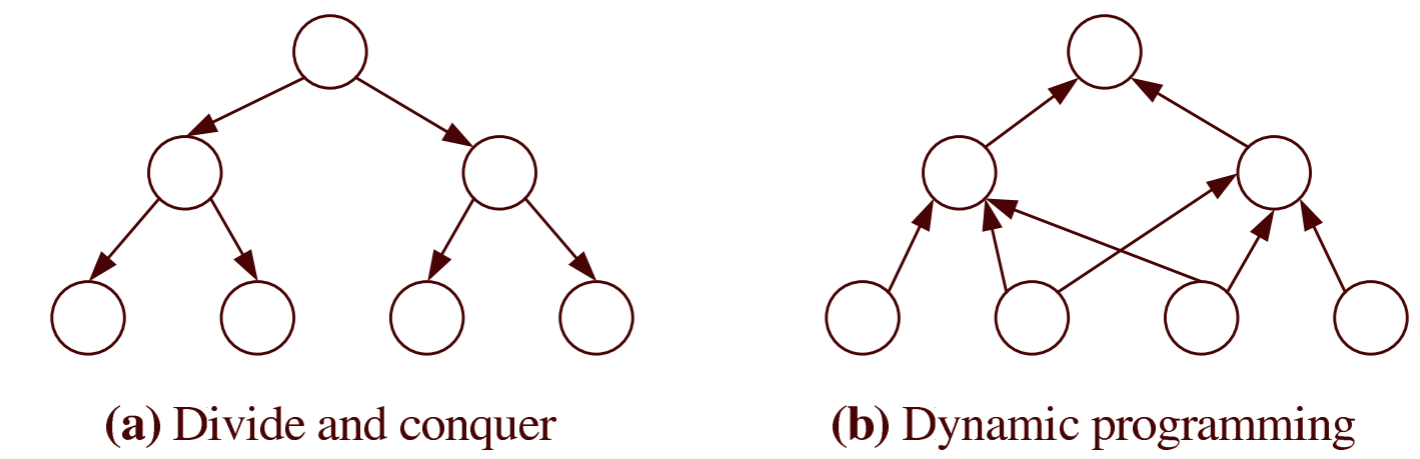

[Clean examples of DP](https://www.eecs.yorku.ca/course_archive/2003-04/S/3101A/notes/dp.pdf)

# Chapter 8 Dynamic programming

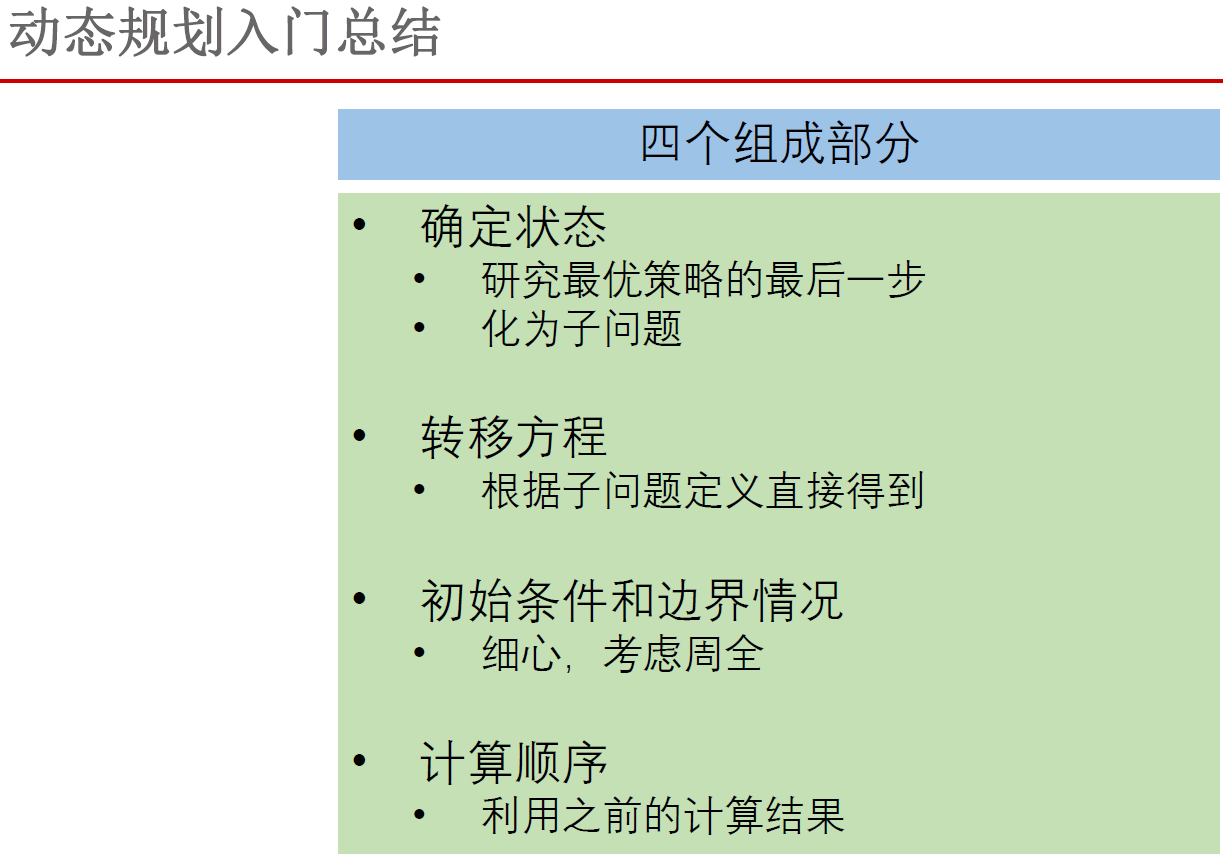

# 669. Coin Change (lc 322)
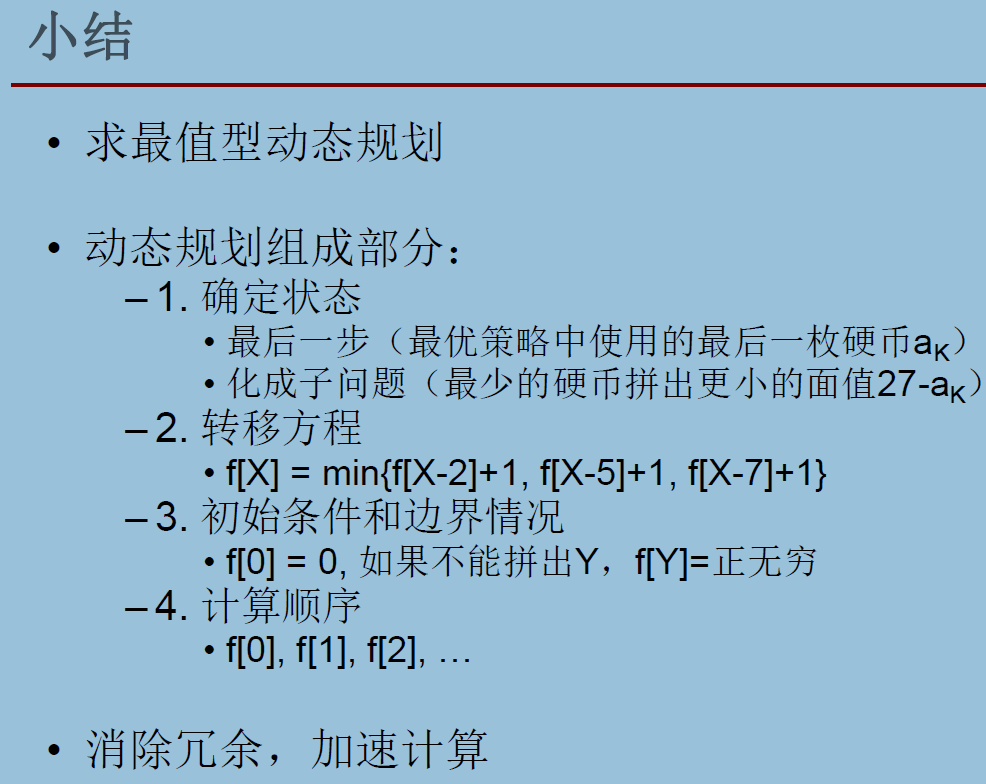

In [7]:
class Solution:
    """
    @param coins: a list of integer
    @param amount: a total amount of money amount
    @return: the fewest number of coins that you need to make up
    """
    def coinChange(self, coins, amount):
        # write your code here
        MAX = 100000000000000
        ans = [MAX for i in range(amount + 1)]  #开辟一个数组
        ans[0] = 0  # f[0] = 0
        for i in range(1, amount + 1):
            for coin in coins:
                if i - coin < 0:
                    continue
                ans[i] = min(ans[i], ans[i - coin] + 1) # 跟 ans[i] = min(f(x-2)+1, f(x-5)+1, f(x-7)+1) 是一个意思
        if ans[amount] == MAX: # 如果不能拼出
            return -1;
        return ans[amount]
    
class Solution:
    def coinChange(self, coins: List[int], amount: int) -> int:
        #MAX = 1000000000
        min_coin = [0] + [float("inf")] * amount
        for i in range(1, amount+1): # special case [2], 3 return -1
            for coin in coins:
                if coin > i:
                    continue
                min_coin[i] = min(min_coin[i], min_coin[i-coin]+1) # initial value is MAX
        if min_coin[-1] == float("inf"):
            return -1
        return min_coin[-1]

# Coin change 2 (lc 518)

In [5]:
# Explanation: https://leetcode.com/problems/coin-change-2/discuss/429736/Python-intuitive-DP-solution
class Solution:
    def change(self, amount, coins):
        """
        :type amount: int
        :type coins: List[int]
        :rtype: int
        """
        dp = [0] * (amount + 1)
        dp[0] = 1 # corner case for dp[1] = dp[2] = 1
        for i in coins:
            for j in range(1, amount + 1): 
                if j >= i:
                    dp[j] += dp[j - i] # dp[2] = dp[2] + dp[1]
                    
        return dp[amount]

# 114. Unique Paths (lc 62)

In [ ]:
# DP
# Time O(mn)
# Space O(mn)
class Solution:
    def uniquePaths(self, m: int, n: int) -> int:
        dp = [[1]*n for _ in range(m)] 
        for i in range(1, m):
            for j in range(1, n):
                    dp[i][j] = dp[i-1][j] + dp[i][j-1]
                    
        return dp[m-1][n-1]
        

# 116. Jump Game 存在型动态规划 (lc 55)


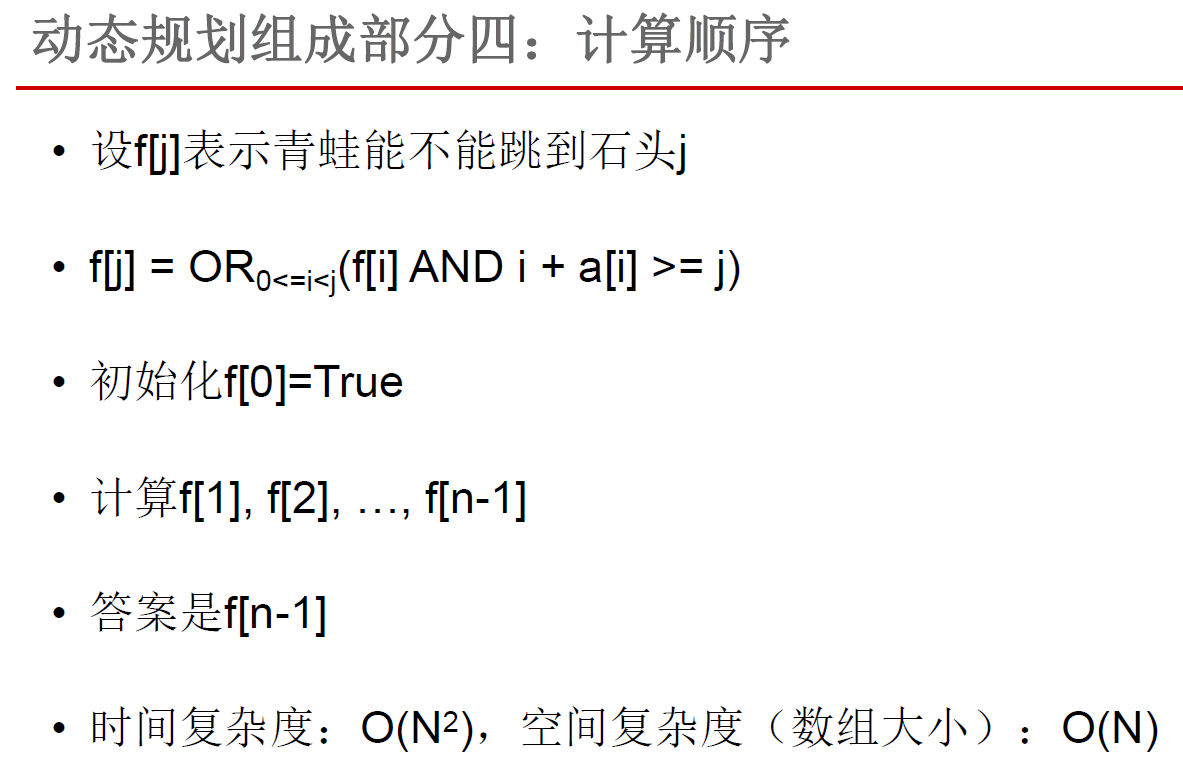

In [ ]:
# DP O(n^2) O(n)
class Solution:
    def canJump(self, nums: List[int]) -> bool:
        ans = [False for i in range(len(nums))] # initialize to False
        ans[0] = True
        
        for i in range(1, len(nums)):
            for j in range(i,-1,-1): # avoid TLE in the case[1,1,1,....1,1,1]
                if nums[j] >= (i - j) and ans[j]:
                    ans[i] = True
                    break # if already know it is True
        return ans[len(nums) - 1]

    
# Greedy O(n) O(1)
class Solution:
    def canJump(self, nums: List[int]) -> bool:
        length = len(nums)
        if length <= 1:
            return True
        
        max_length = 0
        for i in range(length - 1):
            if i > max_length: # early stop
                return False
            else:
                max_length = max(max_length, i + nums[i])
        return max_length >= length - 1

# 191. Maximum Product Subarray (lc 152)


In [ ]:
# O(n) O(1)
class Solution:
    def maxProduct(self, nums: List[int]) -> int:
        if not nums:
            return None
        global_max = prev_max = prev_min = nums[0]
        for num in nums[1:]:
            if num > 0:
                cur_max = max(prev_max * num, num)
                cur_min = min(prev_min * num, num)
            else:
                cur_max = max(prev_min * num, num)
                cur_min = min(prev_max * num, num)
                
            global_max = max(global_max, cur_max)
            
            prev_max, prev_min = cur_max, cur_min
            
        return global_max

# 154. Regular Expression Matching (lc 10)

In [ ]:
# Recursion O(TP) O(TP)
class Solution(object):
    def isMatch(self, text, pattern):
        memo = {}
        def dp(i, j):
            if (i, j) not in memo:
                if j == len(pattern): # if reachs the pattern ending
                    ans = i == len(text)
                else:
                    first_match = i < len(text) and pattern[j] in {text[i], '.'}
                    if j+1 < len(pattern) and pattern[j+1] == '*':
                        ans = dp(i, j+2) or first_match and dp(i+1, j) # repeat or not repeat
                    else:
                        ans = first_match and dp(i+1, j+1)

                memo[i, j] = ans
            return memo[i, j]

        return dp(0, 0)

# Chapter 9 4 key points of DP and Coordinate DP

# 76. Longest Increasing Subsequence (lc 300)

In [ ]:
class Solution:
    """
    @param nums: The integer array
    @return: The length of LIS (longest increasing subsequence)
    """
    def longestIncreasingSubsequence(self, nums):
        if nums is None or not nums:
            return 0
        
        # state: dp[i] 表示从左到右跳到i的最长sequence 的长度, 一定包含i-th element
        
        # initialization: dp[0..n-1] = 1
        dp = [1] * len(nums)
        
        # prev[i] 代表 dp[i] 的最优值是从哪个 dp[j] 算过来的
        prev = [-1] * len(nums)
        
        # function dp[i] = max{dp[j] + 1},  j < i and nums[j] < nums[i]
        for i in range(len(nums)):
            for j in range(i):
                if nums[j] < nums[i] and dp[i] < dp[j] + 1:  #不断比较，最后得到的dp[i]就是最大值
                    dp[i] = dp[j] + 1
                    prev[i] = j  #记录dp[i]是从哪个j过来的
        
        # answer: max(dp[0..n-1])
        longest, last = 0, -1
        for i in range(len(nums)):
            if dp[i] > longest:
                longest = dp[i]  #全局最大值
                last = i #并记录最后一个元素的位置i
        
        path = []
        while last != -1:
            path.append(nums[last])
            last = prev[last]
        print(path[::-1])
        
        return longest

    
# leetcode solution
# O(n^2) O(n)
class Solution:
    def lengthOfLIS(self, nums: List[int]) -> int:
        length = len(nums)
        if length <= 1:
            return length
        dp = [1] * length
        
        for i in range(length):
            for j in range(i):
                if nums[j] < nums[i] and dp[j] + 1 > dp[i]:
                    dp[i] = dp[j] + 1
                    
        return max(dp)
                

# 603 Largest divisible subset(lc 368)

In [1]:
class Solution:
    # @param {int[]} nums a set of distinct positive integers
    # @return {int[]} the largest subset 
    def largestDivisibleSubset(self, nums):
        # Write your code here
        n = len(nums)
        dp = [1] * n
        father = [-1] * n

        nums.sort()
        m, index = 0, -1
        for i in range(n):
            for j in range(i):
                if nums[i] % nums[j] == 0 and 1 + dp[j] > dp[i]:
                    dp[i] = dp[j] + 1
                    father[i] = j

            if dp[i] >= m:
                m = dp[i]
                index = i

        result = []
        for i in range(m):
            result.append(nums[index])
            index = father[index]

        return result

# 110 Minimum Path Sum (lc 64)

In [ ]:
# DP
# Time O(n)
# Space O(1)
class Solution:
    """
    @param grid: a list of lists of integers.
    @return: An integer, minimizes the sum of all numbers along its path
    """
    def minPathSum(self, grid):
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if i == 0 and j > 0:
                    grid[i][j] += grid[i][j-1]
                elif j == 0 and i > 0:
                    grid[i][j] += grid[i-1][j]
                elif i > 0 and j > 0:
                    grid[i][j] += min(grid[i-1][j], grid[i][j-1])
        return grid[-1][-1]

# 115 Unique Paths II (lc 63)

In [ ]:
class Solution:
    """
    @param obstacleGrid: A list of lists of integers
    @return: An integer
    """
    def uniquePathsWithObstacles(self, obstacleGrid):
        
        if obstacleGrid[0][0] == 1:
            return 0          
        m , n = len(obstacleGrid), len(obstacleGrid[0])
            
        for i in range(m):
            for j in range(n):
                if obstacleGrid[i][j] == 1:
                    obstacleGrid[i][j] = 0
                else:
                    if i == 0 and j == 0:
                        obstacleGrid[0][0] = 1
                    elif i == 0:
                        obstacleGrid[i][j] = obstacleGrid[i][j-1]
                    elif j == 0:
                        obstacleGrid[i][j] = obstacleGrid[i-1][j]
                    else:
                        obstacleGrid[i][j] = obstacleGrid[i-1][j] + obstacleGrid[i][j-1]
                
        return obstacleGrid[m-1][n-1]